**Introduction**

In the realm of medical diagnostics, the advent of deep learning techniques, particularly Convolutional Neural Networks (CNNs), has revolutionized the process of analyzing medical images for various conditions. In this context, the classification of chest X-ray images for detecting respiratory ailments such as COVID-19, pneumonia, and normal cases has gained immense importance. In this implementation, a CNN model is developed and trained to classify chest X-ray images into three categories: COVID, NORMAL, and PNEUMONIA. The model is constructed using the Keras library, which provides a convenient interface for building neural network architectures. Through this project, we aim to showcase the effectiveness of CNNs in medical image classification tasks and demonstrate how such technology can aid healthcare professionals in diagnosis and treatment planning.

**Import Libraries**

In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten
import warnings
warnings.filterwarnings('ignore')

**Listing the image directories**

In [ ]:
os.listdir('/content/drive/MyDrive/Covid/Training')

['COVID', 'NORMAL', 'PNEUMONIA']

In [ ]:
os.listdir('/content/drive/MyDrive/Covid/Testing')

['COVID', 'NORMAL', 'PNEUMONIA']

**Load Training data**

In [ ]:
train_data='/content/drive/MyDrive/Covid/Training'
X_train=[]
y_train=[]
Categories=['COVID', 'NORMAL', 'PNEUMONIA']
for i in Categories:
  path=os.path.join(train_data,i)
  images=os.listdir(path)
  for img in images:
    imgpath=os.path.join(path,img)
    img_array=imread(imgpath)
    img_resize=resize(img_array,(150,150,1))
    X_train.append(img_resize)
    y_train.append(Categories.index(i))
  print('Loaded',i)

Loaded COVID
Loaded NORMAL
Loaded PNEUMONIA


**Load Testing data**

In [ ]:
test_data='/content/drive/MyDrive/Covid/Testing'
X_test=[]
y_test=[]
Categories=['COVID', 'NORMAL', 'PNEUMONIA']
for i in Categories:
  path=os.path.join(test_data,i)
  images=os.listdir(path)
  for img in images:
    imgpath=os.path.join(path,img)
    img_array=imread(imgpath)
    img_resize=resize(img_array,(150,150,1))
    X_test.append(img_resize)
    y_test.append(Categories.index(i))
  print('Loaded',i)

Loaded COVID
Loaded NORMAL
Loaded PNEUMONIA


**Convert training and testing datas into array**

In [ ]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(4183, 150, 150, 1)

In [ ]:
X_test.shape

(1045, 150, 150, 1)

In [ ]:
y_train.shape

(4183,)

In [ ]:
y_test.shape

(1045,)

**Model creation**

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(3,activation='softmax'))

**Model Compilation**

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Training the Model**

In [ ]:
model.fit(X_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
42/42 [==============================] - 7s 51ms/step - loss: 1.6372 - accuracy: 0.6854
Epoch 2/10
42/42 [==============================] - 2s 37ms/step - loss: 0.2136 - accuracy: 0.9290
Epoch 3/10
42/42 [==============================] - 2s 38ms/step - loss: 0.1328 - accuracy: 0.9582
Epoch 4/10
42/42 [==============================] - 2s 38ms/step - loss: 0.0906 - accuracy: 0.9713
Epoch 5/10
42/42 [==============================] - 2s 37ms/step - loss: 0.0649 - accuracy: 0.9809
Epoch 6/10
42/42 [==============================] - 2s 37ms/step - loss: 0.0601 - accuracy: 0.9828
Epoch 7/10
42/42 [==============================] - 2s 38ms/step - loss: 0.0457 - accuracy: 0.9880
Epoch 8/10
42/42 [==============================] - 2s 40ms/step - loss: 0.0340 - accuracy: 0.9931
Epoch 9/10
42/42 [==============================] - 2s 41ms/step - loss: 0.0271 - accuracy: 0.9957
Epoch 10/10
42/42 [==============================] - 2s 40ms/step - loss: 0.0185 - accuracy: 0.9993


**Model Evaluation**

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print(loss)
print(accuracy)

33/33 [==============================] - 1s 10ms/step - loss: 0.1054 - accuracy: 0.9675
0.10542496293783188
0.9674640893936157


**Save the model**

In [ ]:
import pickle
pickle.dump(model,open('model.sav','wb'))
model=pickle.load(open('model.sav','rb'))

**Open new image for prediction**

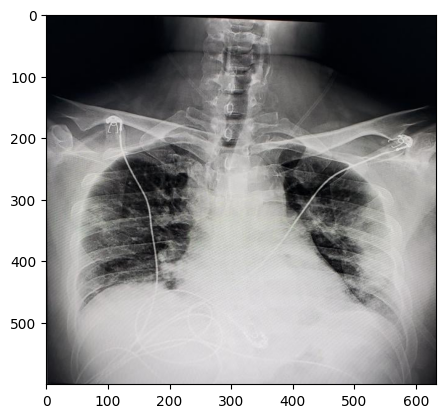

In [ ]:
import matplotlib.pyplot as plt
img=imread('/content/drive/MyDrive/COVID19_Chest DR X-ray_U.S_Patient_from_John_Kim.jpg')
plt.imshow(img)

In [ ]:
img.shape

(600, 633, 3)

In [ ]:
img=resize(img,(150,150,1))
img.shape

(150, 150, 1)

In [ ]:
X_train.shape

(4183, 150, 150, 1)

In [ ]:
img=img.reshape(1,150,150,1)
img.shape

(1, 150, 150, 1)

**Predict with new image**

In [ ]:
y_new=model.predict(img)
y_new

1/1 [==============================] - 0s 17ms/step


array([[9.3258554e-01, 6.7344740e-02, 6.9667942e-05]], dtype=float32)

In [ ]:
ind=y_new.argmax()
print(Categories[ind])

COVID


**Conclusion**

In conclusion, the Convolutional Neural Network (CNN) model exhibits impressive performance, boasting an accuracy of 96.74% and a relatively low loss of 0.1054 on the testing dataset. This high accuracy underscores the effectiveness of the model in accurately classifying chest X-ray images into COVID-19, pneumonia, and normal cases. With such robust performance, the model holds significant promise as a valuable tool for assisting healthcare professionals in diagnosing respiratory conditions swiftly and accurately.